In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [132]:
df = pd.read_csv('data.csv')

In [133]:
df.count()

id                  64958
year                64958
institute_type      64958
round_no            64958
quota               64958
pool                64958
institute_short     64958
program_name        64958
program_duration    64958
degree_short        64958
category            64958
opening_rank        64958
closing_rank        64958
is_preparatory      64958
dtype: int64

In [134]:
df.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


In [135]:
df.drop(['id', 'institute_short', 'program_name', 'program_duration', 'degree_short'],axis=1, inplace=True)

In [136]:
df.category.unique()

array(['GEN', 'OBC-NCL', 'SC', 'ST', 'GEN-PWD', 'OBC-NCL-PWD', 'SC-PWD',
       'ST-PWD', 'GEN-EWS', 'GEN-EWS-PWD'], dtype=object)

In [137]:
df.institute_type = df.institute_type.map({'IIT':0, 'NIT':1})
df.quota = df.quota.map({'AI':0, 'HS':1, 'OS':2, 'AP':3, 'GO':4, 'JK':5, 'LA':6})
df.pool = df.pool.map({'Gender-Neutral':0, 'Female-Only':1})
df.category = df.category.map({'GEN':0, 'OBC-NCL':1, 'SC':2, 'ST':3, 'GEN-PWD':4, 'OBC-NCL-PWD':5, 'SC-PWD':6, 'ST-PWD':7, 'GEN-EWS':8, 'GEN-EWS-PWD':9})

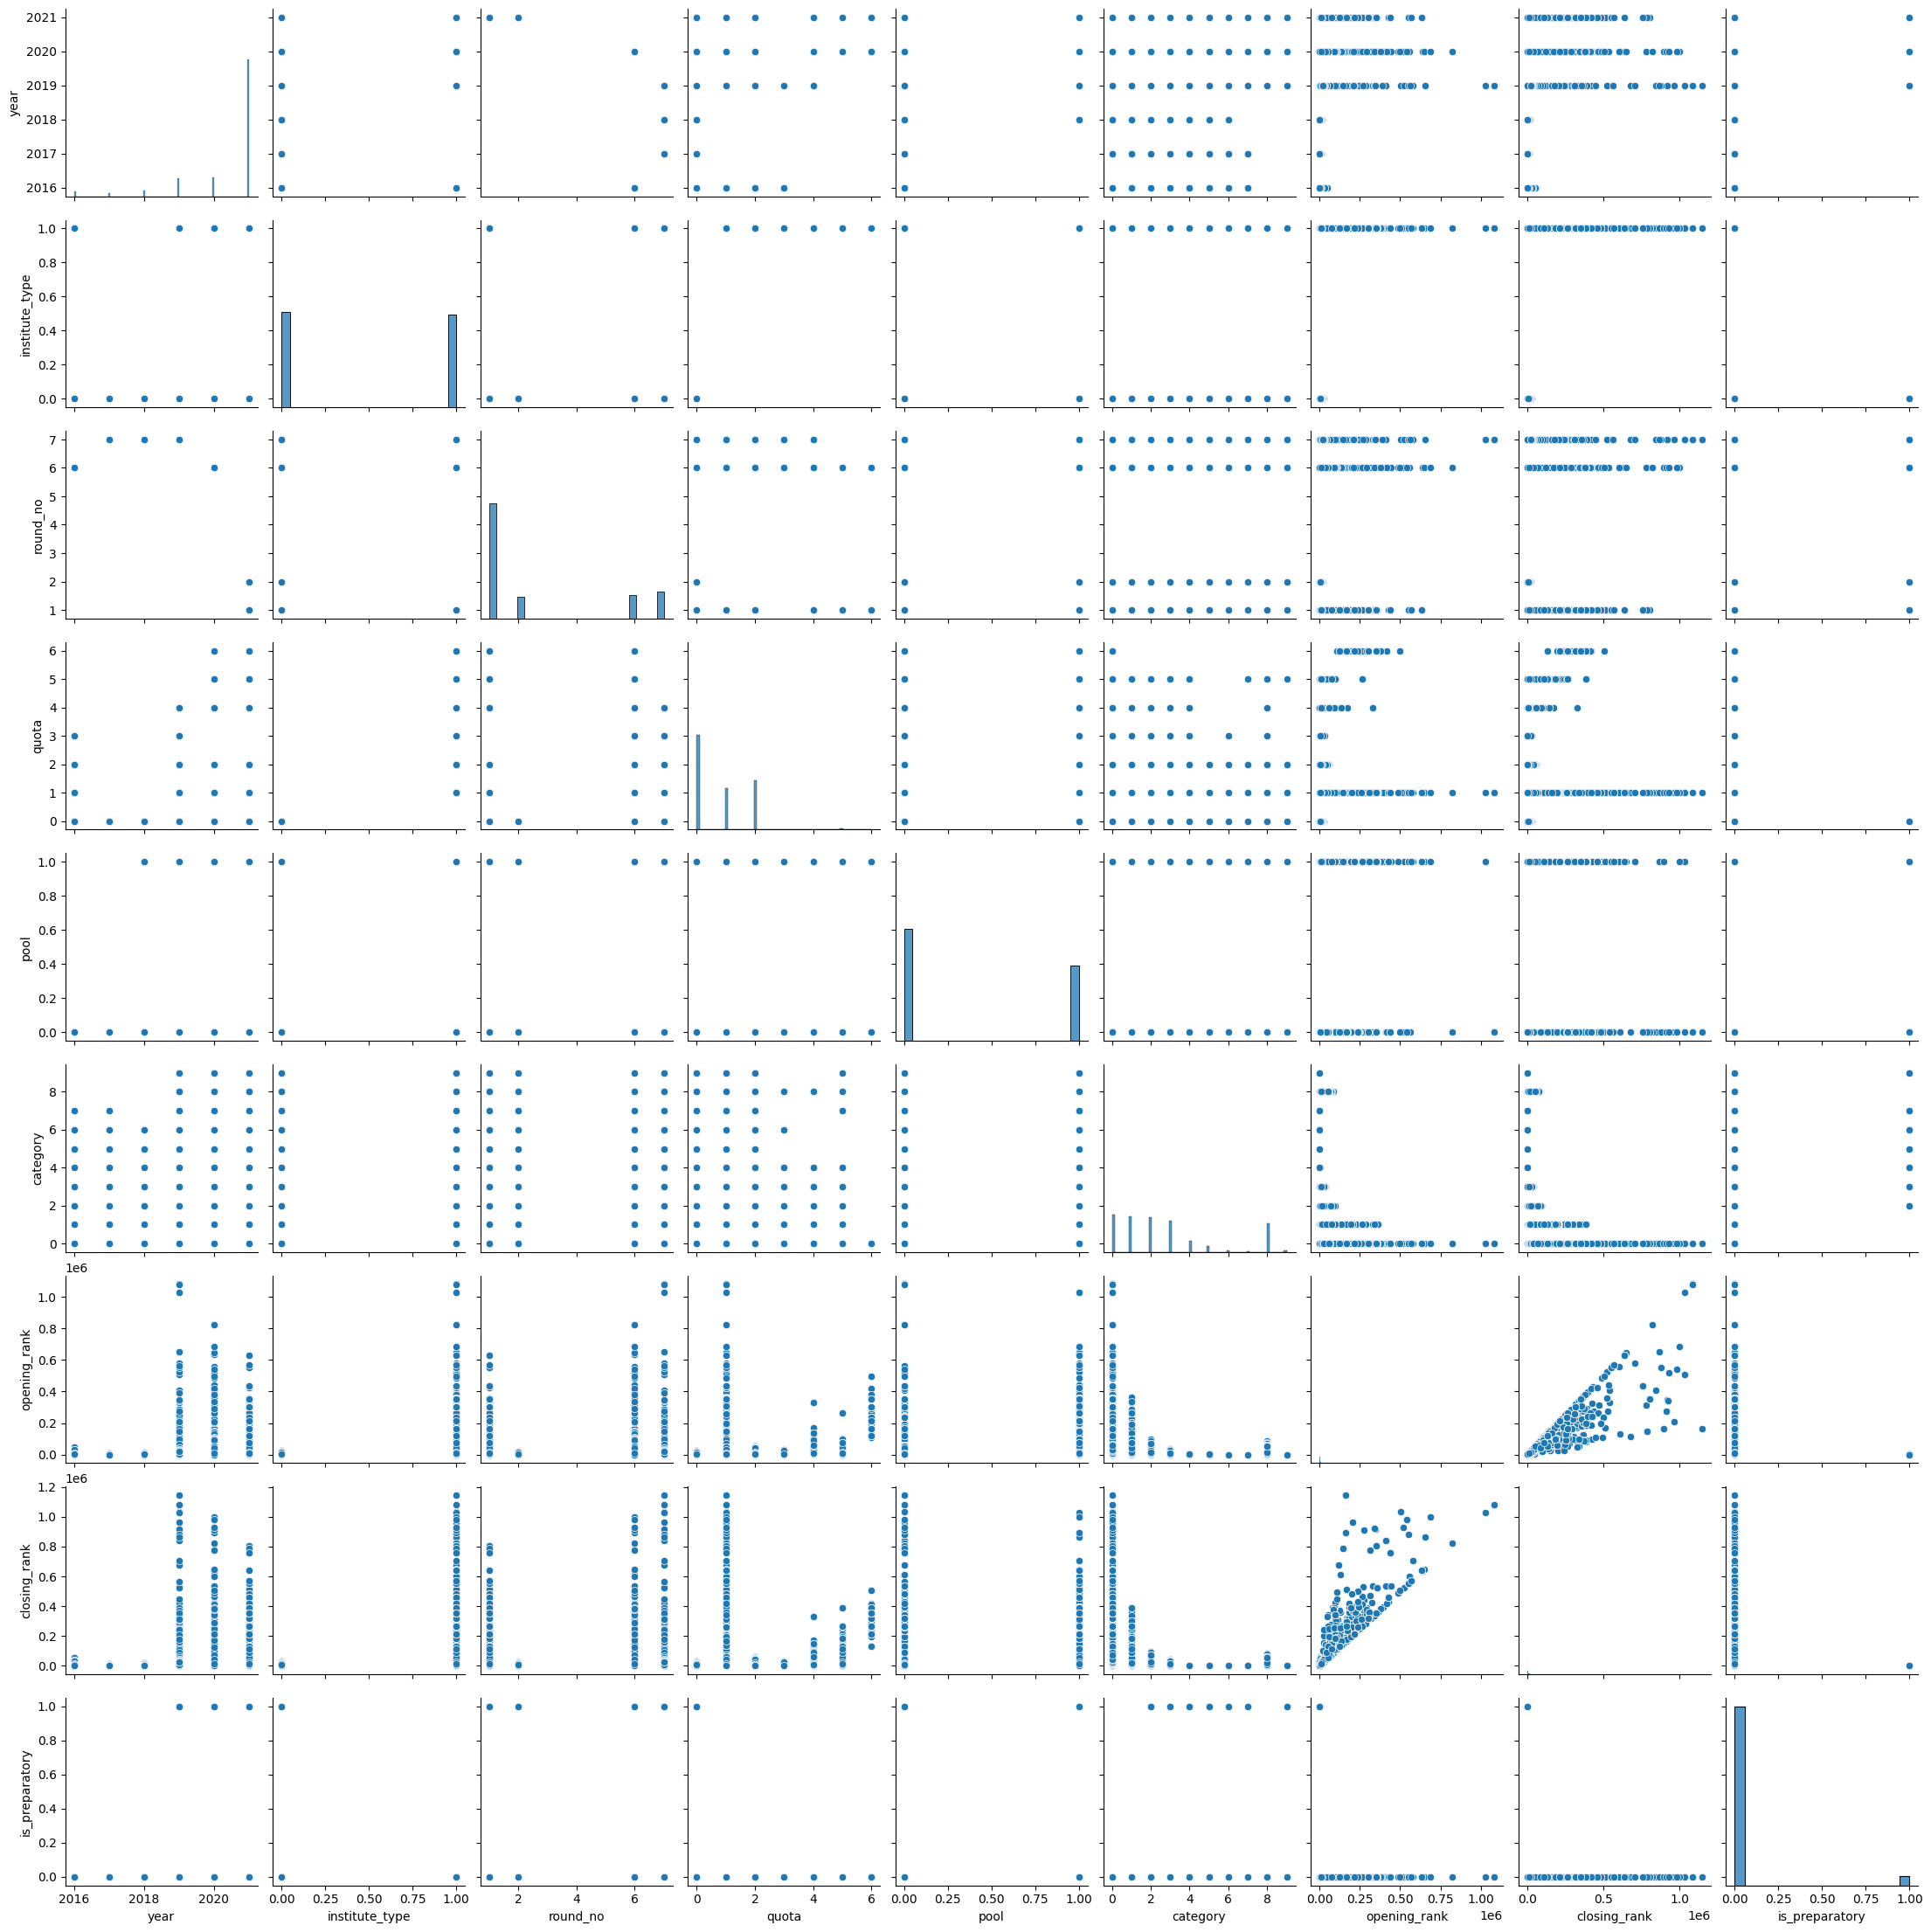

In [138]:
sb.pairplot(df)

In [139]:
data_x = df.drop(['year', 'round_no', 'pool', 'category', 'is_preparatory'], axis=1)
data_y = df.is_preparatory

In [140]:
tree = DecisionTreeClassifier(criterion='log_loss')
neighbors = KNeighborsClassifier(n_neighbors=7)

In [141]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1)

In [142]:
tree.fit(x_train, y_train)
neighbors.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [143]:
tree.score(x_test, y_test)

0.9810652709359606

In [144]:
neighbors.score(x_test,y_test)

0.979679802955665

In [147]:
x_test

,institute_type,quota,opening_rank,closing_rank
18034,0,0,73,86
12138,0,0,1266,1684
63114,1,1,9613,9613
30578,0,0,34,34
684,0,0,809,835
...,...,...,...,...
34683,1,1,31898,47913
3624,0,0,8144,9597
63787,1,1,8892,8892
28384,0,0,2215,2473


In [146]:
institute_type_labels = {0:'IIT', 1:'NIT'}
quota_labels = {0:'AI', 1:'HS', 2:'OS', 3:'AP', 4:'GO', 5:'JK', 6:'LA'}

In [150]:
institute_type = 0
quota = 6
opening_rank = 75
closing_rank = 100
tree_predicted = tree.predict([[institute_type, quota, opening_rank, closing_rank]])
neighbor_predicted = neighbors.predict([[institute_type, quota, opening_rank, closing_rank]])
predicted_labels = {0:'No', 1:'Si'}

d:\Universidad\Quinto_Semestre\Algoritmica\Practico4\classifier_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Universidad\Quinto_Semestre\Algoritmica\Practico4\classifier_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [153]:
print(f'El examen en el tipo de instituto {institute_type_labels[institute_type]}, el cual esta disponible en la siguiente region {quota_labels[quota]}, el cual empezó con un rango de {opening_rank} y terminó con un rango de {closing_rank}')
print(f'Decision Tree predijó que el examen {predicted_labels[tree_predicted[0]]} tiene disponible un curso preparatorio')
print(f'KNearestNeighbor predijó que el examen {predicted_labels[neighbor_predicted[0]]} tiene disponible un curso preparatorio')

El examen en el tipo de instituto IIT, el cual esta disponible en la siguiente region LA, el cual empezó con un rango de 75 y terminó con un rango de 100
Decision Tree predijó que el examen No tiene disponible un curso preparatorio
KNearestNeighbor predijó que el examen No tiene disponible un curso preparatorio
